# Before jumping to the code implementation
- Gif를 사용하지 않고 해당 ipynb파일만 다운받고 싶으면 wget이나 curl을 사용하여도 좋습니다. 
    - wget https://raw.githubusercontent.com/COMBINE-SKKU/bio_data_mining/master/Lecture4-Performance_evaluation_code_only.ipynb
    - curl https://raw.githubusercontent.com/COMBINE-SKKU/bio_data_mining/master/Lecture4-Performance_evaluation_code_only.ipynb --output Lecture4-Performance_evaluation_code_only.ipynb
<br><br><br>    
- 동영상과 같이 git clone을 사용하고 싶은 학생이 주의하여야 할 점은 git은 원칙적으로 이미 존재하는 디렉토리에는 clone을 하지 않으므로 디렉토리 (예를 들자면 /Documents/BioDataMining)를 지워주고 실행하여야 합니다. 
- Open the terminal and make a directory dedicated for this class code implementation (e.g., mkdir ~/Documents/BioDataMining)
- Install Git (https://git-scm.com/book/en/v2/Getting-Started-Installing-Git)
- Go to the directory for this class, and type: git clone https://github.com/COMBINE-SKKU/bio_data_mining.git
- If you are a newbie for programming a python and jupyter notebook, please install anaconda 
    - Window: https://problemsolvingwithpython.com/01-Orientation/01.03-Installing-Anaconda-on-Windows/
    - Mac: https://problemsolvingwithpython.com/01-Orientation/01.04-Installing-Anaconda-on-MacOS/
    - Linux: https://problemsolvingwithpython.com/01-Orientation/01.05-Installing-Anaconda-on-Linux/
- And learn how to open a jupyter notebook (https://www.youtube.com/watch?v=OJMILWh6ARY)
- Run the following codes.

# MNIST Digit Classification
***
- Examples from TextBook "O'Reilly book Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow" p85-99

<center><img src='Figure/Fig4-12.PNG'></center>

In [7]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [8]:
X, y = mnist["data"], mnist["target"]
X.shape 

(70000, 784)

In [9]:
y.shape

(70000,)

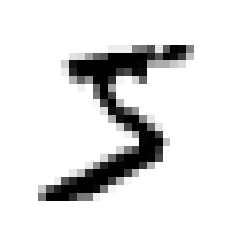

5

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

y = y.astype(np.uint8)
y[0]

# Digit classification using a Random Forest algorithm

In [24]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [25]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

In [26]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(forest_clf)
    
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    
    print(n_correct / len(y_pred))

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.98885
0.9863
0.98635


In [15]:
from sklearn.model_selection import cross_val_score

cross_val_score(forest_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.98885, 0.9863 , 0.98635])

# Confusion Matrix

In [16]:
# Just like the cross_val_score() function, cross_val_predict() performs K-fold cross-validation, 
# but instead of returning the evaluation scores, it returns the predictions made on each test fold.
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

<center><img src='Figure/Fig4-13.PNG'></center>

In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred).transpose()
cm[:,[1,0]] = cm[:,[0,1]]
cm[[1,0],:] = cm[[0,1],:]

cm

array([[ 4696,    45],
       [  725, 54534]])

In [28]:
from sklearn.metrics import precision_score, recall_score

print('manual calcualtion of precision: ', end='')
print(cm[0, 0] / ( cm[0, 0] + cm[0, 1] ))

print('precision_score: ', end='')
print(precision_score(y_train_5, y_train_pred))

print('manual calcualtion of recall (sensitivity): ', end='')
print(cm[0, 0] / ( cm[0, 0] + cm[1, 0] ))

print('recall_score: ', end='')
print(recall_score(y_train_5, y_train_pred))

manual calcualtion of precision: 0.9905083315756169
precision_score: 0.9905083315756169
manual calcualtion of recall (sensitivity): 0.8662608374838591
recall_score: 0.8662608374838591


$F_{1}=\frac{2}{\frac{1}{\text {precision}}+\frac{1}{\text {recall}}}$

In [29]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.9242275142688446

# Precision/Recall Trade-Off
<br>
<center><img src='Figure/Fig4-14.PNG'></center>

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class

In [18]:
y_scores_forest

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

In [19]:
threshold = 0.5
y_some_digit_pred = (y_scores_forest[0] > threshold)
print(y_some_digit_pred)

threshold = 0.9
y_some_digit_pred = (y_scores_forest[0] > threshold)
print(y_some_digit_pred)

True
False


# Present precision-recall curves

In [36]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores_forest)

In [21]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)      
    plt.grid(True)                         

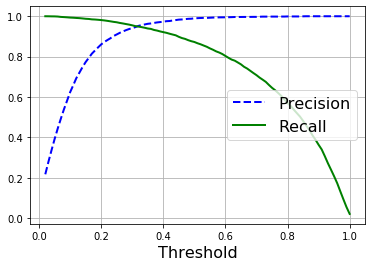

In [37]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

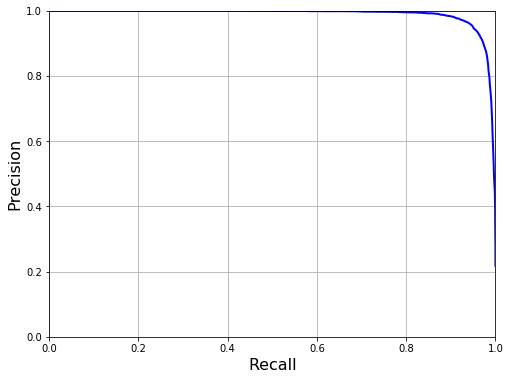

In [38]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

# The ROC Curve

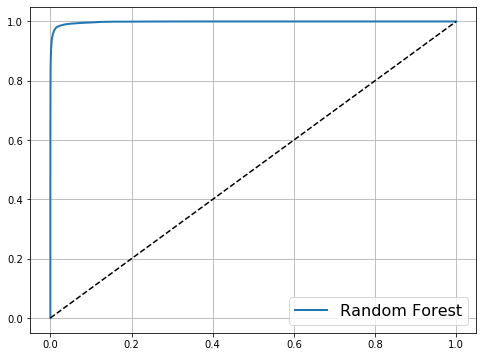

0.9983436731328145

In [39]:
from sklearn.metrics import roc_curve

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

plt.figure(figsize=(8, 6))
plt.plot(fpr_forest, tpr_forest, linewidth=2, label="Random Forest")
plt.plot([0, 1], [0, 1], 'k--')
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores_forest)